In [2]:
import lhapdf
#import ROOT
import math
import json
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
plt.rcParams['text.usetex'] = True

from iminuit import Minuit
import sys
sys.path.insert(1,'DSS')
import fDSS_

In [3]:
with open('yield_ratio_Q2zRunGx_combined.json') as j_RD:
    RD_Q2zRunGx = json.load(j_RD)
with open('yield_ratio_Q2zxRunG_combined.json') as j_Q2zxRunG:
    RD_Q2zxRunG = json.load(j_Q2zxRunG)
    
colors = ['antiquewhite','antiquewhite','aqua','aquamarine','azure','darkgreen','bisque','blue','blueviolet','brown','burlywood','cadetblue','chartreuse','cornflowerblue','coral','crimson','darkgoldenrod','darkgreen','darkorange','darksalmon','darkorchid','darkseagreen','darkslateblue','darkslategrey','darkviolet','dimgray','firebrick','forestgreen','goldenrod','green','greenyellow','hotpink','indigo','indianred','khaki','lavender','lawngreen','lemonchiffon','lightblue','lightcoral','lightsalmon','lightsteelblue','mediumorchid','mediumturquoise','navy','olive','orange','orangered','palevioletred','pink','red','royalblue','seagreen','sienna','slateblue','springgreen','tan','teal','thistle','tomato','wheat','yellow']


def Get_weighted_average(value,error):
    sum_mean = 0
    sum_sigma = 0
    for i in range(len(value)):
        sum_mean += value[i]/(error[i]*error[i])
        sum_sigma += 1/(error[i]*error[i])
    return sum_mean/sum_sigma
def Get_weighted_sigma(value,error):
    sum_sigma = 0
    for i in range(len(value)):
        sum_sigma += 1/(error[i]*error[i])
    return math.sqrt(1/sum_sigma)



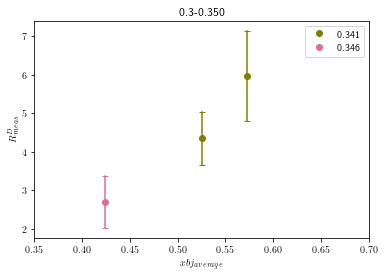

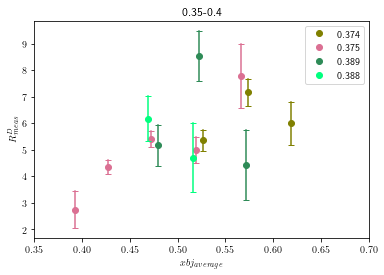

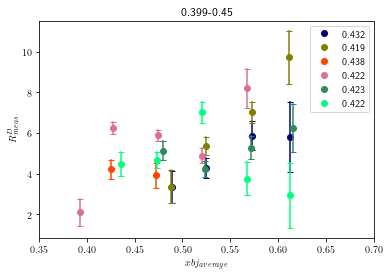

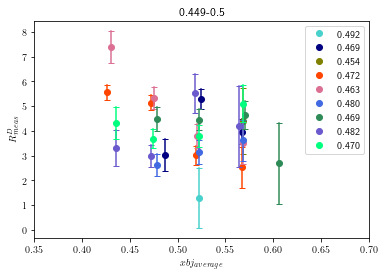

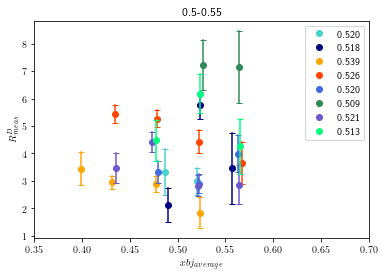

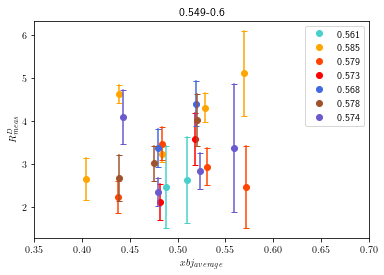

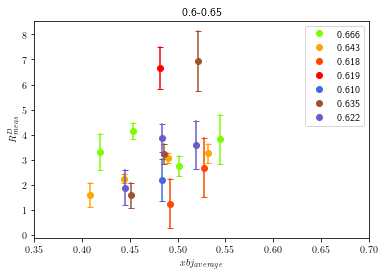

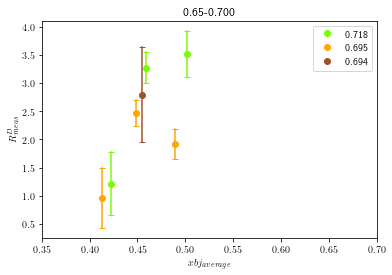

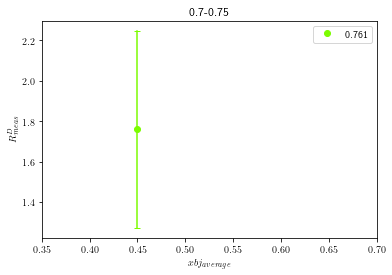

In [4]:
Q2 = 5.5
#RDs_xbj = []
#RDs_xbj_err = []
for key_z,z_value in RD_Q2zRunGx["5.500000"].items():
    z_hadron = float(key_z) 
    fig = plt.figure()
    ax = fig.add_subplot()
    #color = ['b','g','r','c','m','y','firebrick','salmon','sienna','orange','tan','peachpuff','teal','hotpink']
    for key_rungroup,rungroup_value in z_value.items():
        RunGroup = int(key_rungroup)
        xbjs = []
        RDs = []
        RDs_error = []
        #print(RunGroup)
        z_corrs = []
        z_corr_errs = []
        for key_xbj, xbj_value in rungroup_value.items():
            xbj = float(key_xbj)#+0.0001*RunGroup
            RD=float(xbj_value["value"])
            RD_error = float(xbj_value["error"])
            RDs.append(float(xbj_value["value"]))
            RDs_error.append(float(xbj_value["error"]))
            xbj_corr = float(xbj_value["xbj_corr"])*xbj
            xbjs.append(xbj_corr)
            z_corr = float(xbj_value["z_corr"])*z_hadron
            z_corr_err = float(xbj_value["z_corr_err"])
            z_corrs.append(z_corr)
            z_corr_errs.append(z_corr_err)
            ax.plot([xbj_corr,xbj_corr],[RD+RD_error,RD-RD_error],marker="_",color = colors[RunGroup//10])
        
        z_corr = Get_weighted_average(z_corrs,z_corr_errs)
        #W2 = 0.938**2+Q2*(1-xbj_corr)/xbj_corr
        z_corr_str = str(z_corr)
        plt.plot(xbjs,RDs,"o",color = colors[RunGroup//10],label = z_corr_str[0:5])
        plt.xlabel(r'$xbj_{average}$')
        plt.ylabel(r'$R^D_{meas}$')
        plt.xlim(0.35,0.7)
        plt.legend()
        ax.set_title(str(z_hadron-0.025)[0:5]+"-"+str(z_hadron+0.025)[0:5])



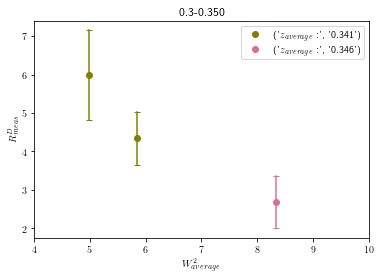

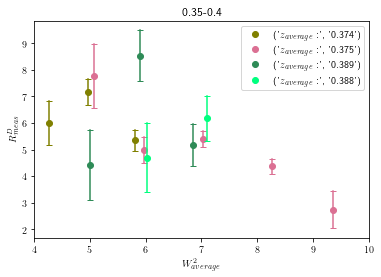

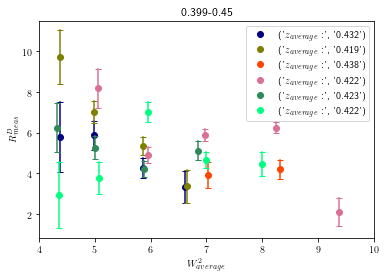

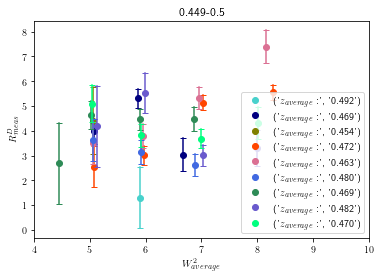

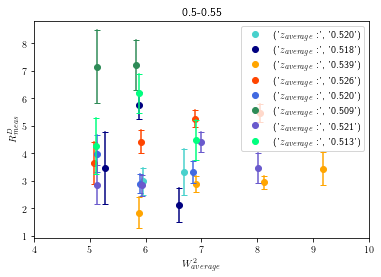

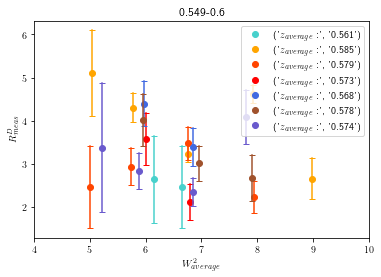

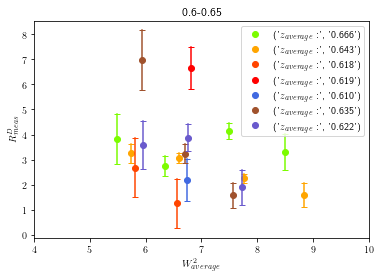

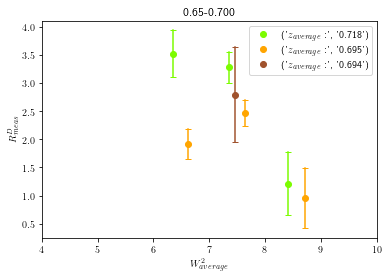

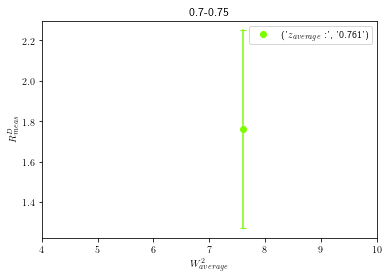

In [5]:
Q2 = 5.5
#RDs_xbj = []
#RDs_xbj_err = []
for key_z,z_value in RD_Q2zRunGx["5.500000"].items():
    z_hadron = float(key_z) 
    fig = plt.figure()
    ax = fig.add_subplot()
    #color = ['b','g','r','c','m','y','firebrick','salmon','sienna','orange','tan','peachpuff','teal','hotpink']
    for key_rungroup,rungroup_value in z_value.items():
        RunGroup = int(key_rungroup)
        xbjs = []
        W2s = []
        RDs = []
        RDs_error = []
        #print(RunGroup)
        z_corrs = []
        z_corr_errs = []
        for key_xbj, xbj_value in rungroup_value.items():
            xbj = float(key_xbj)#+0.0001*RunGroup
            RD=float(xbj_value["value"])
            RD_error = float(xbj_value["error"])
            RDs.append(float(xbj_value["value"]))
            RDs_error.append(float(xbj_value["error"]))
            xbj_corr = float(xbj_value["xbj_corr"])*xbj
            W2 = 0.938**2+Q2*(1-xbj_corr)/xbj_corr
            xbjs.append(xbj_corr)
            W2s.append(W2)
            z_corr = float(xbj_value["z_corr"])*z_hadron
            z_corr_err = float(xbj_value["z_corr_err"])
            z_corrs.append(z_corr)
            z_corr_errs.append(z_corr_err)
            ax.plot([W2,W2],[RD+RD_error,RD-RD_error],marker="_",color = colors[RunGroup//10])
        
        z_corr = Get_weighted_average(z_corrs,z_corr_errs)
        
        z_corr_str = str(z_corr)
        plt.plot(W2s,RDs,"o",color = colors[RunGroup//10],label = (r'$z_{average}:$',z_corr_str[0:5]))
        plt.xlabel(r'$W^2_{average}$')
        plt.ylabel(r'$R^D_{meas}$')
        plt.xlim(4,10)
        plt.legend()
        ax.set_title(str(z_hadron-0.025)[0:5]+"-"+str(z_hadron+0.025)[0:5])



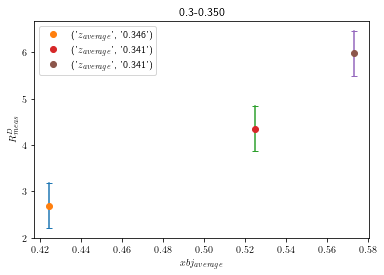

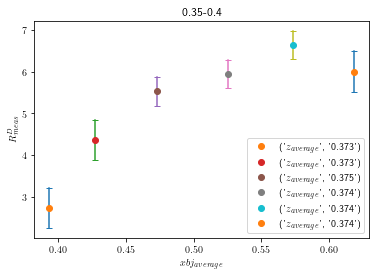

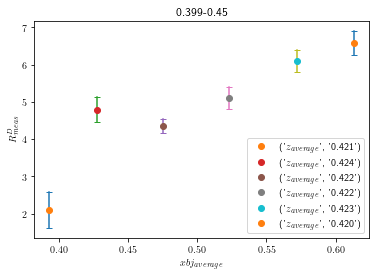

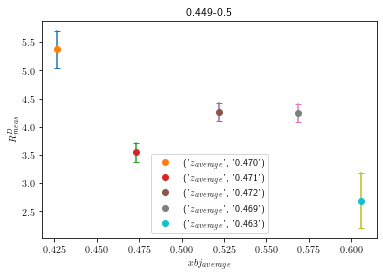

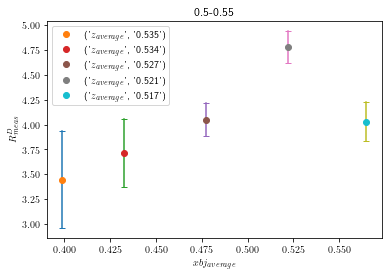

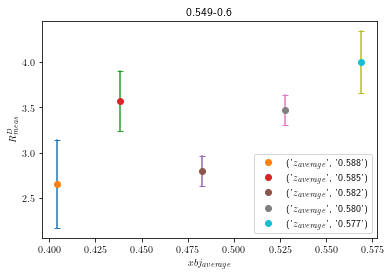

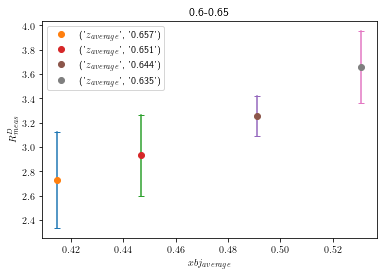

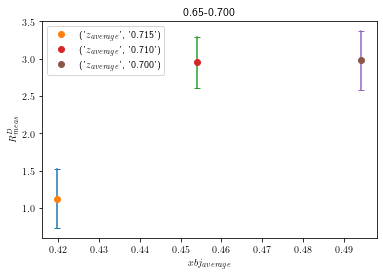

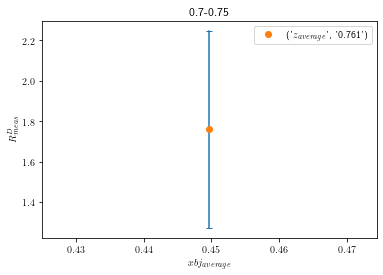

In [6]:
Q2 = 5.5
#RDs_xbj = []
#RDs_xbj_err = []
for key_z,z_value in RD_Q2zxRunG["5.500000"].items():
    z_hadron = float(key_z) 
    #print(z_hadron)
    fig = plt.figure()
    ax = fig.add_subplot()
    #color = ['b','g','r','c','m','y','firebrick','salmon','sienna','orange','tan','peachpuff','teal','hotpink']
    for key_xbj,xbj_value in z_value.items():
        xbj = float(key_xbj)
        #print(xbj)
        RDs = []
        RDs_err = []
        zs_corr = []
        zs_corr_err = []
        xbjs_corr = []
        xbjs_corr_err = []
        for key_RunGroup,RunGroup_value in xbj_value.items():
            RunGroup = float(key_RunGroup)
            RD=float(RunGroup_value["value"])
            RD_error = float(RunGroup_value["error"])
            RDs.append(float(RunGroup_value["value"]))
            RDs_error.append(float(RunGroup_value["error"]))
            z_corr = float(RunGroup_value["z_corr"])*z_hadron
            zs_corr.append(z_corr)
            z_corr_err = float(RunGroup_value["z_corr_err"])*z_hadron
            zs_corr_err.append(z_corr_err)
            xbj_corr = float(RunGroup_value["xbj_corr"])*xbj
            xbj_corr_err = float(RunGroup_value["xbj_corr_err"])
            xbjs_corr.append(xbj_corr)
            xbjs_corr_err.append(xbj_corr_err)
            #ax.plot([z_corr,z_corr],[RD+RD_error,RD-RD_error],marker="_",color = colors[RunGroup//10])
        xbj_corr = Get_weighted_average(xbjs_corr,xbjs_corr_err)
        z_corr = Get_weighted_average(zs_corr,zs_corr_err)
        RD = Get_weighted_average(RDs,RDs_error)
        RD_err = Get_weighted_sigma(RDs,RDs_error)
        W2 = 0.938**2+Q2*(1-xbj_corr)/xbj_corr
        #xbj_all_corr.append(xbj_corr)
        
        ax.plot([xbj_corr,xbj_corr],[RD+RD_err,RD-RD_err],marker = "_")
        plt.plot(xbj_corr,RD,"o",label = (r'$z_{average}$',str(z_corr)[0:5]))
        plt.xlabel(r'$xbj_{average}$')
        plt.ylabel(r'$R^D_{meas}$')
        #plt.xlim(0.3,1)
        plt.legend()
        ax.set_title(str(z_hadron-0.025)[0:5]+"-"+str(z_hadron+0.025)[0:5])
    

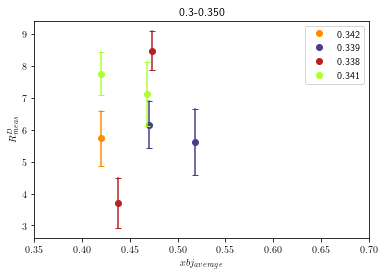

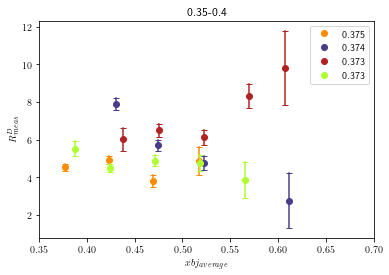

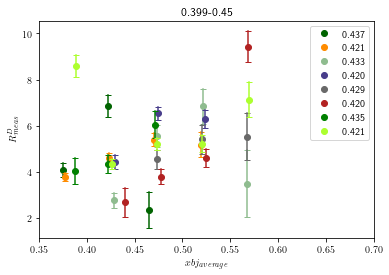

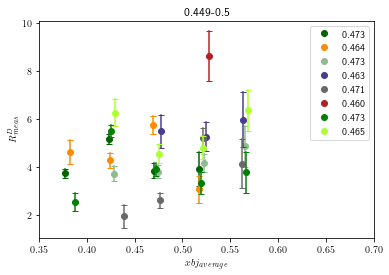

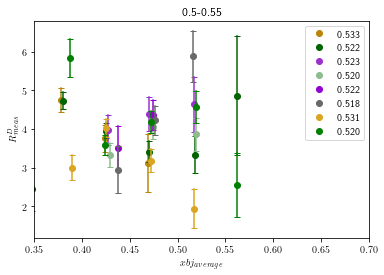

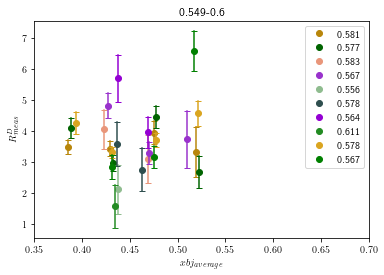

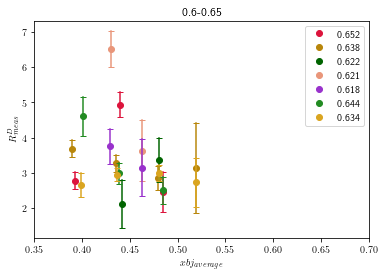

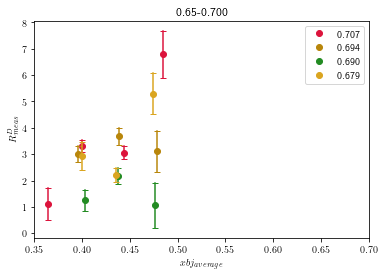

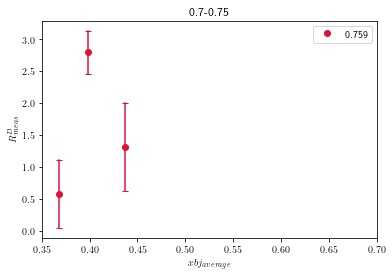

In [7]:
Q2 = 4.75
#RDs_xbj = []
#RDs_xbj_err = []
for key_z,z_value in RD_Q2zRunGx["4.750000"].items():
    z_hadron = float(key_z) 
    fig = plt.figure()
    ax = fig.add_subplot()
    #color = ['b','g','r','c','m','y','firebrick','salmon','sienna','orange','tan','peachpuff','teal','hotpink']
    for key_rungroup,rungroup_value in z_value.items():
        RunGroup = int(key_rungroup)
        xbjs = []
        RDs = []
        RDs_error = []
        #print(RunGroup)
        z_corrs = []
        z_corr_errs = []
        for key_xbj, xbj_value in rungroup_value.items():
            xbj = float(key_xbj)#+0.0001*RunGroup
            RD=float(xbj_value["value"])
            RD_error = float(xbj_value["error"])
            RDs.append(float(xbj_value["value"]))
            RDs_error.append(float(xbj_value["error"]))
            xbj_corr = float(xbj_value["xbj_corr"])*xbj
            xbjs.append(xbj_corr)
            z_corr = float(xbj_value["z_corr"])*z_hadron
            z_corr_err = float(xbj_value["z_corr_err"])
            z_corrs.append(z_corr)
            z_corr_errs.append(z_corr_err)
            ax.plot([xbj_corr,xbj_corr],[RD+RD_error,RD-RD_error],marker="_",color = colors[RunGroup//10])
        
        z_corr = Get_weighted_average(z_corrs,z_corr_errs)
        #W2 = 0.938**2+Q2*(1-xbj_corr)/xbj_corr
        z_corr_str = str(z_corr)
        plt.plot(xbjs,RDs,"o",color = colors[RunGroup//10],label = z_corr_str[0:5])
        plt.xlabel(r'$xbj_{average}$')
        plt.ylabel(r'$R^D_{meas}$')
        plt.xlim(0.35,0.7)
        plt.legend()
        ax.set_title(str(z_hadron-0.025)[0:5]+"-"+str(z_hadron+0.025)[0:5])




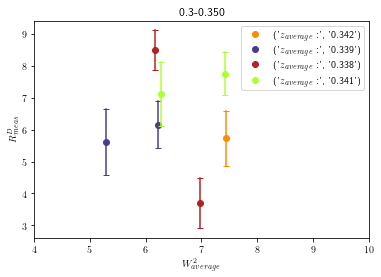

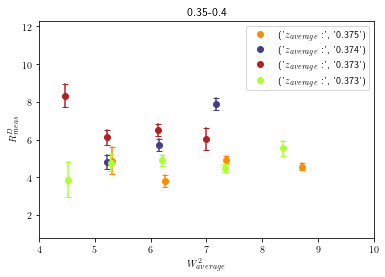

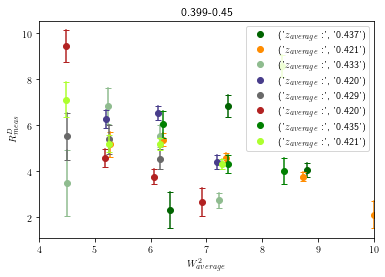

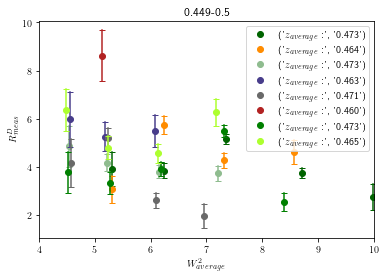

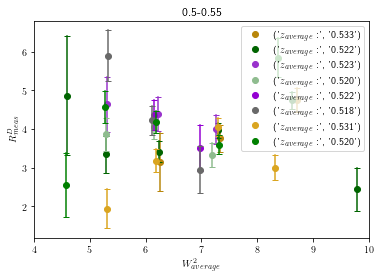

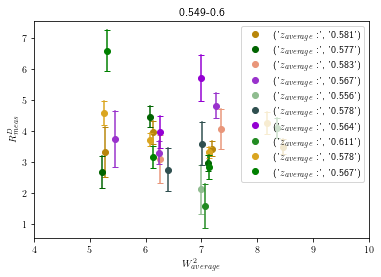

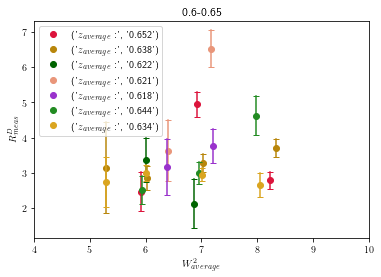

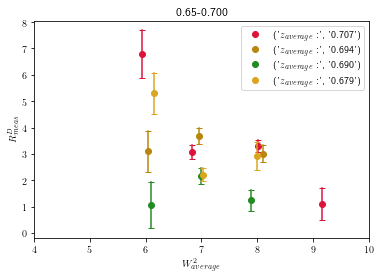

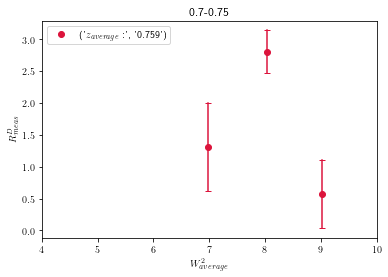

In [8]:
Q2 = 4.75
#RDs_xbj = []
#RDs_xbj_err = []
for key_z,z_value in RD_Q2zRunGx["4.750000"].items():
    z_hadron = float(key_z) 
    fig = plt.figure()
    ax = fig.add_subplot()
    #color = ['b','g','r','c','m','y','firebrick','salmon','sienna','orange','tan','peachpuff','teal','hotpink']
    for key_rungroup,rungroup_value in z_value.items():
        RunGroup = int(key_rungroup)
        xbjs = []
        W2s = []
        RDs = []
        RDs_error = []
        #print(RunGroup)
        z_corrs = []
        z_corr_errs = []
        for key_xbj, xbj_value in rungroup_value.items():
            xbj = float(key_xbj)#+0.0001*RunGroup
            RD=float(xbj_value["value"])
            RD_error = float(xbj_value["error"])
            RDs.append(float(xbj_value["value"]))
            RDs_error.append(float(xbj_value["error"]))
            xbj_corr = float(xbj_value["xbj_corr"])*xbj
            W2 = 0.938**2+Q2*(1-xbj_corr)/xbj_corr
            xbjs.append(xbj_corr)
            W2s.append(W2)
            z_corr = float(xbj_value["z_corr"])*z_hadron
            z_corr_err = float(xbj_value["z_corr_err"])
            z_corrs.append(z_corr)
            z_corr_errs.append(z_corr_err)
            ax.plot([W2,W2],[RD+RD_error,RD-RD_error],marker="_",color = colors[RunGroup//10])
        
        z_corr = Get_weighted_average(z_corrs,z_corr_errs)
        
        z_corr_str = str(z_corr)
        plt.plot(W2s,RDs,"o",color = colors[RunGroup//10],label = (r'$z_{average}:$',z_corr_str[0:5]))
        plt.xlabel(r'$W^2_{average}$')
        plt.ylabel(r'$R^D_{meas}$')
        plt.xlim(4,10)
        plt.legend()
        ax.set_title(str(z_hadron-0.025)[0:5]+"-"+str(z_hadron+0.025)[0:5])




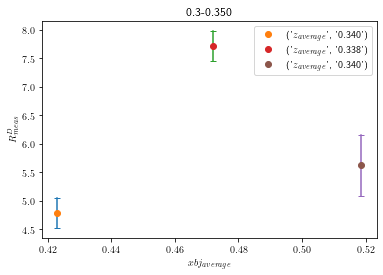

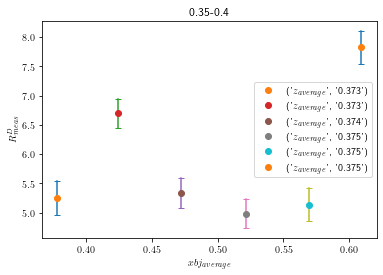

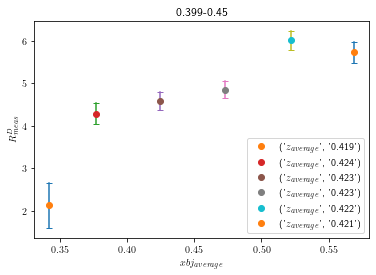

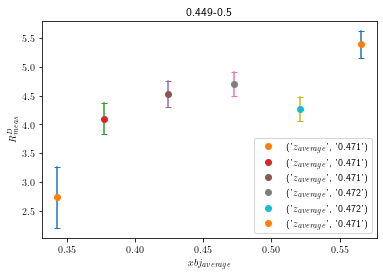

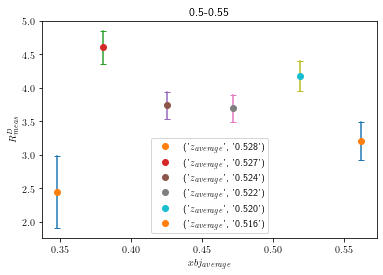

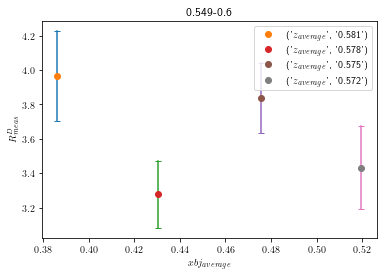

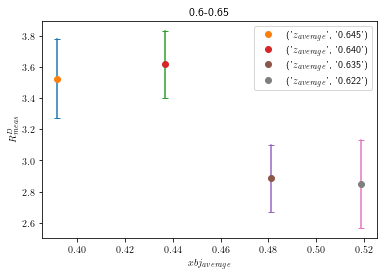

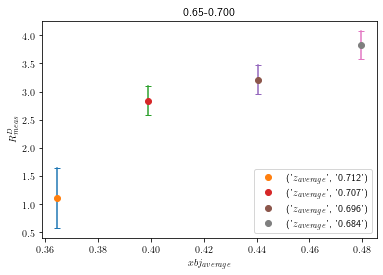

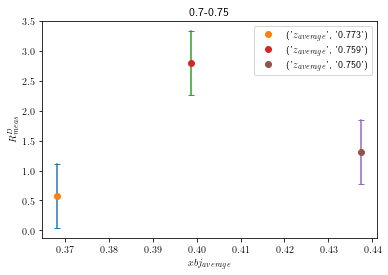

In [9]:
Q2 = 4.75
#RDs_xbj = []
#RDs_xbj_err = []
for key_z,z_value in RD_Q2zxRunG["4.750000"].items():
    z_hadron = float(key_z) 
    #print(z_hadron)
    fig = plt.figure()
    ax = fig.add_subplot()
    #color = ['b','g','r','c','m','y','firebrick','salmon','sienna','orange','tan','peachpuff','teal','hotpink']
    for key_xbj,xbj_value in z_value.items():
        xbj = float(key_xbj)
        #print(xbj)
        RDs = []
        RDs_err = []
        zs_corr = []
        zs_corr_err = []
        xbjs_corr = []
        xbjs_corr_err = []
        for key_RunGroup,RunGroup_value in xbj_value.items():
            RunGroup = float(key_RunGroup)
            RD=float(RunGroup_value["value"])
            RD_error = float(RunGroup_value["error"])
            RDs.append(float(RunGroup_value["value"]))
            RDs_error.append(float(RunGroup_value["error"]))
            z_corr = float(RunGroup_value["z_corr"])*z_hadron
            zs_corr.append(z_corr)
            z_corr_err = float(RunGroup_value["z_corr_err"])*z_hadron
            zs_corr_err.append(z_corr_err)
            xbj_corr = float(RunGroup_value["xbj_corr"])*xbj
            xbj_corr_err = float(RunGroup_value["xbj_corr_err"])
            xbjs_corr.append(xbj_corr)
            xbjs_corr_err.append(xbj_corr_err)
            #ax.plot([z_corr,z_corr],[RD+RD_error,RD-RD_error],marker="_",color = colors[RunGroup//10])
        xbj_corr = Get_weighted_average(xbjs_corr,xbjs_corr_err)
        z_corr = Get_weighted_average(zs_corr,zs_corr_err)
        RD = Get_weighted_average(RDs,RDs_error)
        RD_err = Get_weighted_sigma(RDs,RDs_error)
        W2 = 0.938**2+Q2*(1-xbj_corr)/xbj_corr
        #xbj_all_corr.append(xbj_corr)
        
        ax.plot([xbj_corr,xbj_corr],[RD+RD_err,RD-RD_err],marker = "_")
        plt.plot(xbj_corr,RD,"o",label = (r'$z_{average}$',str(z_corr)[0:5]))
        plt.xlabel(r'$xbj_{average}$')
        plt.ylabel(r'$R^D_{meas}$')
        #plt.xlim(0.3,1)
        plt.legend()
        ax.set_title(str(z_hadron-0.025)[0:5]+"-"+str(z_hadron+0.025)[0:5])
    

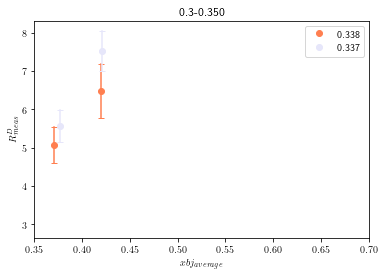

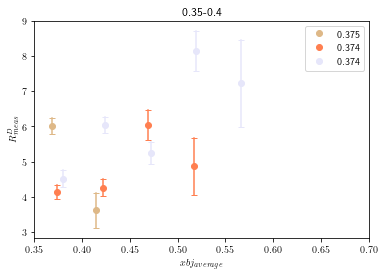

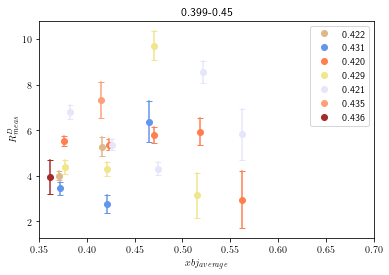

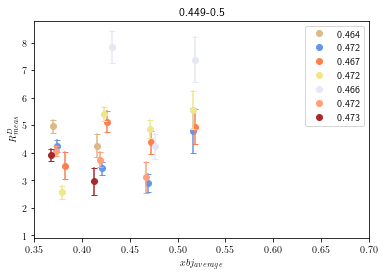

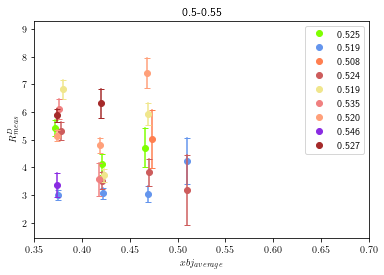

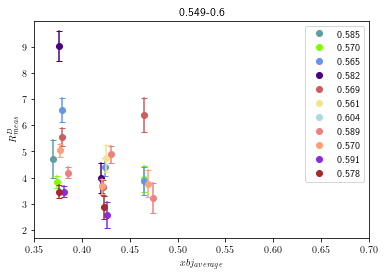

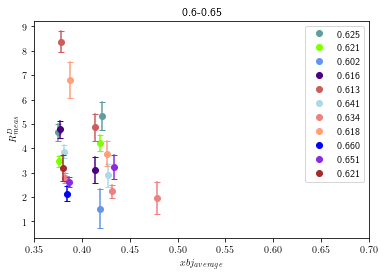

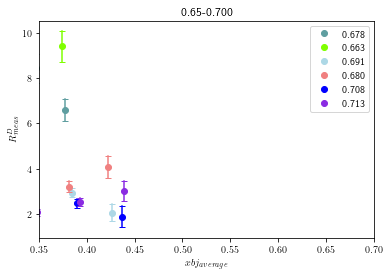

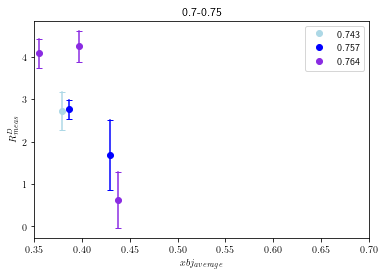

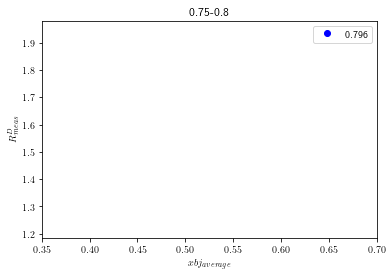

In [10]:
Q2 = 4.0
#RDs_xbj = []
#RDs_xbj_err = []
for key_z,z_value in RD_Q2zRunGx["4.000000"].items():
    z_hadron = float(key_z) 
    fig = plt.figure()
    ax = fig.add_subplot()
    #color = ['b','g','r','c','m','y','firebrick','salmon','sienna','orange','tan','peachpuff','teal','hotpink']
    for key_rungroup,rungroup_value in z_value.items():
        RunGroup = int(key_rungroup)
        xbjs = []
        RDs = []
        RDs_error = []
        #print(RunGroup)
        z_corrs = []
        z_corr_errs = []
        for key_xbj, xbj_value in rungroup_value.items():
            xbj = float(key_xbj)#+0.0001*RunGroup
            RD=float(xbj_value["value"])
            RD_error = float(xbj_value["error"])
            RDs.append(float(xbj_value["value"]))
            RDs_error.append(float(xbj_value["error"]))
            xbj_corr = float(xbj_value["xbj_corr"])*xbj
            xbjs.append(xbj_corr)
            z_corr = float(xbj_value["z_corr"])*z_hadron
            z_corr_err = float(xbj_value["z_corr_err"])
            z_corrs.append(z_corr)
            z_corr_errs.append(z_corr_err)
            ax.plot([xbj_corr,xbj_corr],[RD+RD_error,RD-RD_error],marker="_",color = colors[RunGroup//10])
        
        z_corr = Get_weighted_average(z_corrs,z_corr_errs)
        #W2 = 0.938**2+Q2*(1-xbj_corr)/xbj_corr
        z_corr_str = str(z_corr)
        plt.plot(xbjs,RDs,"o",color = colors[RunGroup//10],label = z_corr_str[0:5])
        plt.xlabel(r'$xbj_{average}$')
        plt.ylabel(r'$R^D_{meas}$')
        plt.xlim(0.35,0.7)
        plt.legend()
        ax.set_title(str(z_hadron-0.025)[0:5]+"-"+str(z_hadron+0.025)[0:5])





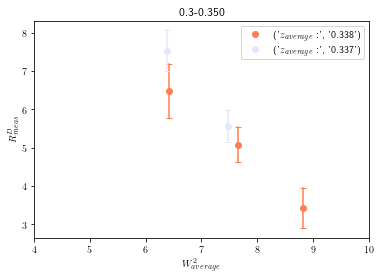

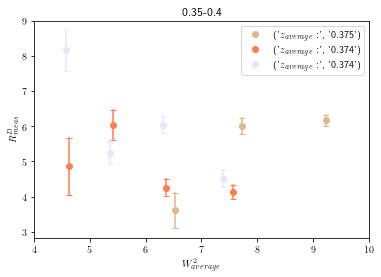

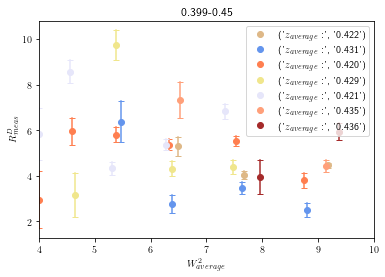

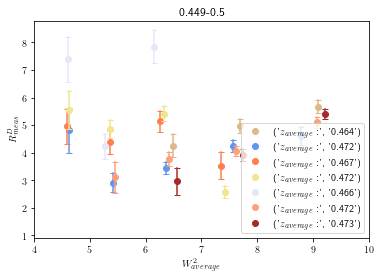

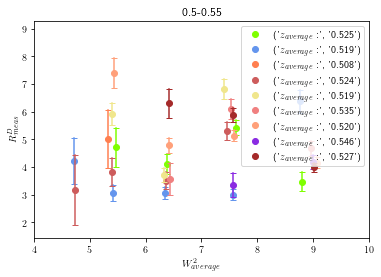

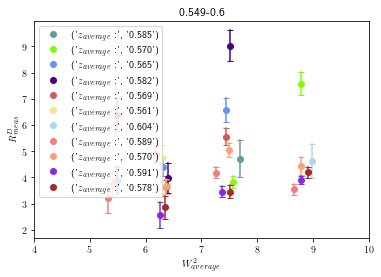

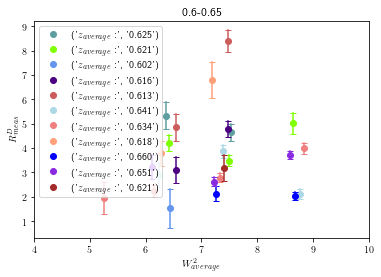

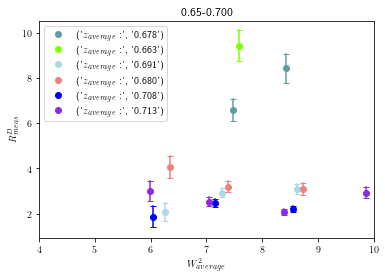

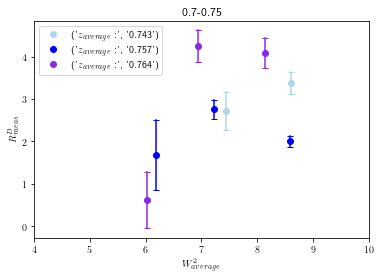

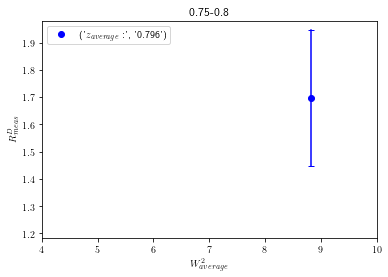

In [11]:
Q2 = 4.00
#RDs_xbj = []
#RDs_xbj_err = []
for key_z,z_value in RD_Q2zRunGx["4.000000"].items():
    z_hadron = float(key_z) 
    fig = plt.figure()
    ax = fig.add_subplot()
    #color = ['b','g','r','c','m','y','firebrick','salmon','sienna','orange','tan','peachpuff','teal','hotpink']
    for key_rungroup,rungroup_value in z_value.items():
        RunGroup = int(key_rungroup)
        xbjs = []
        W2s = []
        RDs = []
        RDs_error = []
        #print(RunGroup)
        z_corrs = []
        z_corr_errs = []
        for key_xbj, xbj_value in rungroup_value.items():
            xbj = float(key_xbj)#+0.0001*RunGroup
            RD=float(xbj_value["value"])
            RD_error = float(xbj_value["error"])
            RDs.append(float(xbj_value["value"]))
            RDs_error.append(float(xbj_value["error"]))
            xbj_corr = float(xbj_value["xbj_corr"])*xbj
            W2 = 0.938**2+Q2*(1-xbj_corr)/xbj_corr
            xbjs.append(xbj_corr)
            W2s.append(W2)
            z_corr = float(xbj_value["z_corr"])*z_hadron
            z_corr_err = float(xbj_value["z_corr_err"])
            z_corrs.append(z_corr)
            z_corr_errs.append(z_corr_err)
            ax.plot([W2,W2],[RD+RD_error,RD-RD_error],marker="_",color = colors[RunGroup//10])
        
        z_corr = Get_weighted_average(z_corrs,z_corr_errs)
        
        z_corr_str = str(z_corr)
        plt.plot(W2s,RDs,"o",color = colors[RunGroup//10],label = (r'$z_{average}:$',z_corr_str[0:5]))
        plt.xlabel(r'$W^2_{average}$')
        plt.ylabel(r'$R^D_{meas}$')
        plt.xlim(4,10)
        plt.legend()
        ax.set_title(str(z_hadron-0.025)[0:5]+"-"+str(z_hadron+0.025)[0:5])




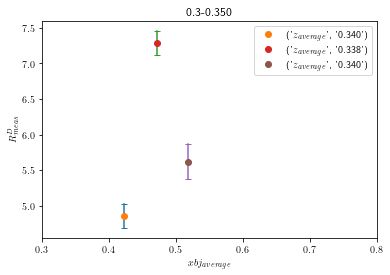

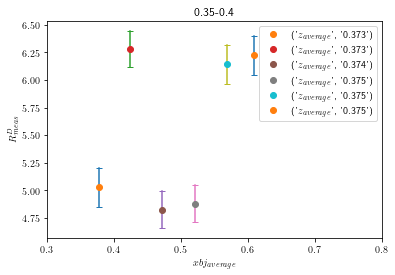

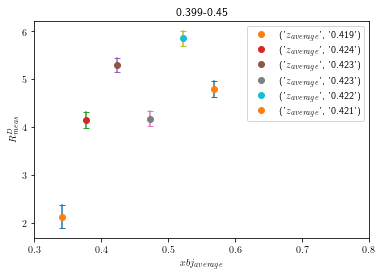

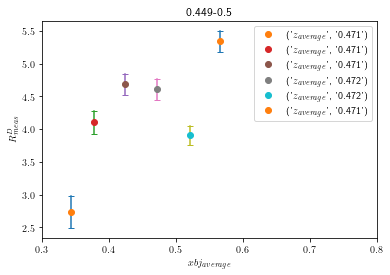

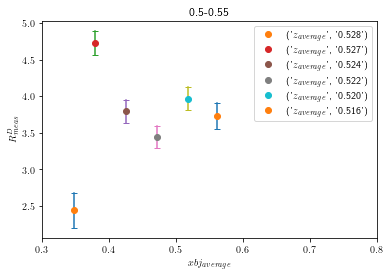

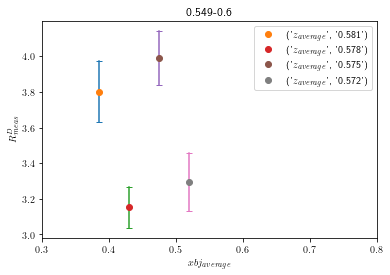

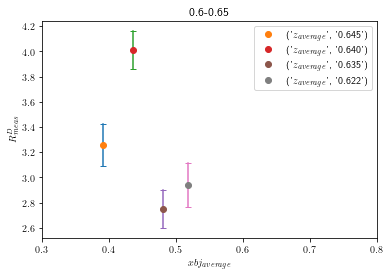

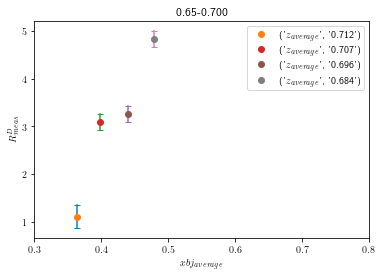

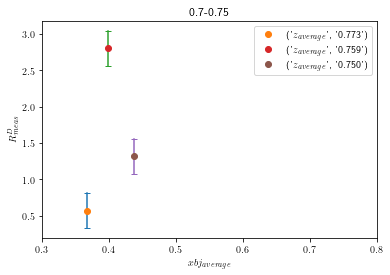

In [12]:
Q2 = 4.75
#RDs_xbj = []
#RDs_xbj_err = []
for key_z,z_value in RD_Q2zxRunG["4.750000"].items():
    z_hadron = float(key_z) 
    #print(z_hadron)
    fig = plt.figure()
    ax = fig.add_subplot()
    #color = ['b','g','r','c','m','y','firebrick','salmon','sienna','orange','tan','peachpuff','teal','hotpink']
    for key_xbj,xbj_value in z_value.items():
        xbj = float(key_xbj)
        #print(xbj)
        RDs = []
        RDs_err = []
        zs_corr = []
        zs_corr_err = []
        xbjs_corr = []
        xbjs_corr_err = []
        for key_RunGroup,RunGroup_value in xbj_value.items():
            RunGroup = float(key_RunGroup)
            RD=float(RunGroup_value["value"])
            RD_error = float(RunGroup_value["error"])
            RDs.append(float(RunGroup_value["value"]))
            RDs_error.append(float(RunGroup_value["error"]))
            z_corr = float(RunGroup_value["z_corr"])*z_hadron
            zs_corr.append(z_corr)
            z_corr_err = float(RunGroup_value["z_corr_err"])*z_hadron
            zs_corr_err.append(z_corr_err)
            xbj_corr = float(RunGroup_value["xbj_corr"])*xbj
            xbj_corr_err = float(RunGroup_value["xbj_corr_err"])
            xbjs_corr.append(xbj_corr)
            xbjs_corr_err.append(xbj_corr_err)
            #ax.plot([z_corr,z_corr],[RD+RD_error,RD-RD_error],marker="_",color = colors[RunGroup//10])
        xbj_corr = Get_weighted_average(xbjs_corr,xbjs_corr_err)
        z_corr = Get_weighted_average(zs_corr,zs_corr_err)
        RD = Get_weighted_average(RDs,RDs_error)
        RD_err = Get_weighted_sigma(RDs,RDs_error)
        W2 = 0.938**2+Q2*(1-xbj_corr)/xbj_corr
        #xbj_all_corr.append(xbj_corr)
        
        ax.plot([xbj_corr,xbj_corr],[RD+RD_err,RD-RD_err],marker = "_")
        plt.plot(xbj_corr,RD,"o",label = (r'$z_{average}$',str(z_corr)[0:5]))
        plt.xlabel(r'$xbj_{average}$')
        plt.ylabel(r'$R^D_{meas}$')
        plt.xlim(0.3,0.8)
        plt.legend()
        ax.set_title(str(z_hadron-0.025)[0:5]+"-"+str(z_hadron+0.025)[0:5])



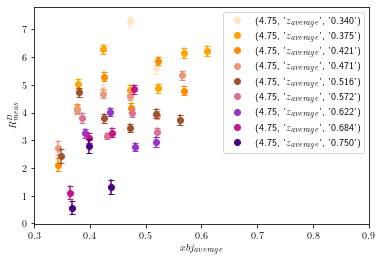

In [36]:
Q2 = 4.75
#RDs_xbj = []
#RDs_xbj_err = []
i_color = 0
colors = ['bisque','orange','darkorange','darksalmon','sienna','palevioletred','darkorchid','mediumvioletred','indigo']
for key_z,z_value in RD_Q2zxRunG["4.750000"].items():
    z_hadron = float(key_z) 
    #print(z_hadron)
    #fig = plt.figure()
    ax = fig.add_subplot()
    xbj_corrs = []
    RD_ones = []
    #color = ['b','g','r','c','m','y','firebrick','salmon','sienna','orange','tan','peachpuff','teal','hotpink']
    for key_xbj,xbj_value in z_value.items():
        xbj = float(key_xbj)
        #print(xbj)
        RDs = []
        RDs_err = []
        zs_corr = []
        zs_corr_err = []
        xbjs_corr = []
        xbjs_corr_err = []
        for key_RunGroup,RunGroup_value in xbj_value.items():
            RunGroup = float(key_RunGroup)
            RD=float(RunGroup_value["value"])
            RD_error = float(RunGroup_value["error"])
            RDs.append(float(RunGroup_value["value"]))
            RDs_error.append(float(RunGroup_value["error"]))
            z_corr = float(RunGroup_value["z_corr"])*z_hadron
            zs_corr.append(z_corr)
            z_corr_err = float(RunGroup_value["z_corr_err"])*z_hadron
            zs_corr_err.append(z_corr_err)
            xbj_corr = float(RunGroup_value["xbj_corr"])*xbj
            xbj_corr_err = float(RunGroup_value["xbj_corr_err"])
            xbjs_corr.append(xbj_corr)
            xbjs_corr_err.append(xbj_corr_err)
            #ax.plot([z_corr,z_corr],[RD+RD_error,RD-RD_error],marker="_",color = colors[RunGroup//10])
        xbj_corr = Get_weighted_average(xbjs_corr,xbjs_corr_err)
        z_corr = Get_weighted_average(zs_corr,zs_corr_err)
        RD = Get_weighted_average(RDs,RDs_error)
        RD_err = Get_weighted_sigma(RDs,RDs_error)
        W2 = 0.938**2+Q2*(1-xbj_corr)/xbj_corr
        #xbj_all_corr.append(xbj_corr)
        xbj_corrs.append(xbj_corr)
        RD_ones.append(RD)
        plt.plot([xbj_corr,xbj_corr],[RD+RD_err,RD-RD_err],marker = "_",color = colors[i_color])
    plt.plot(xbj_corrs,RD_ones,"o",label = (Q2,r'$z_{average}$',str(z_corr)[0:5]),color = colors[i_color])
    plt.xlabel(r'$xbj_{average}$')
    plt.ylabel(r'$R^D_{meas}$')
    plt.xlim(0.3,0.9)
    plt.legend()
    
    i_color +=1
        #ax.set_title(str(z_hadron-0.025)[0:5]+"-"+str(z_hadron+0.025)[0:5])




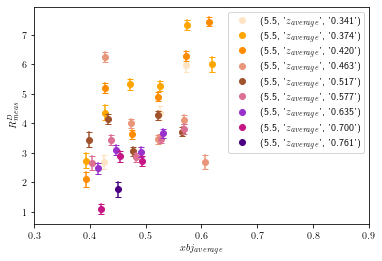

In [39]:
Q2 = 5.5
#RDs_xbj = []
#RDs_xbj_err = []
i_color = 0
colors = ['bisque','orange','darkorange','darksalmon','sienna','palevioletred','darkorchid','mediumvioletred','indigo']
for key_z,z_value in RD_Q2zxRunG["5.500000"].items():
    z_hadron = float(key_z) 
    #print(z_hadron)
    #fig = plt.figure()
    ax = fig.add_subplot()
    xbj_corrs = []
    RD_ones = []
    #color = ['b','g','r','c','m','y','firebrick','salmon','sienna','orange','tan','peachpuff','teal','hotpink']
    for key_xbj,xbj_value in z_value.items():
        xbj = float(key_xbj)
        #print(xbj)
        RDs = []
        RDs_err = []
        zs_corr = []
        zs_corr_err = []
        xbjs_corr = []
        xbjs_corr_err = []
        for key_RunGroup,RunGroup_value in xbj_value.items():
            RunGroup = float(key_RunGroup)
            RD=float(RunGroup_value["value"])
            RD_error = float(RunGroup_value["error"])
            RDs.append(float(RunGroup_value["value"]))
            RDs_error.append(float(RunGroup_value["error"]))
            z_corr = float(RunGroup_value["z_corr"])*z_hadron
            zs_corr.append(z_corr)
            z_corr_err = float(RunGroup_value["z_corr_err"])*z_hadron
            zs_corr_err.append(z_corr_err)
            xbj_corr = float(RunGroup_value["xbj_corr"])*xbj
            xbj_corr_err = float(RunGroup_value["xbj_corr_err"])
            xbjs_corr.append(xbj_corr)
            xbjs_corr_err.append(xbj_corr_err)
            #ax.plot([z_corr,z_corr],[RD+RD_error,RD-RD_error],marker="_",color = colors[RunGroup//10])
        xbj_corr = Get_weighted_average(xbjs_corr,xbjs_corr_err)
        z_corr = Get_weighted_average(zs_corr,zs_corr_err)
        RD = Get_weighted_average(RDs,RDs_error)
        RD_err = Get_weighted_sigma(RDs,RDs_error)
        W2 = 0.938**2+Q2*(1-xbj_corr)/xbj_corr
        #xbj_all_corr.append(xbj_corr)
        xbj_corrs.append(xbj_corr)
        RD_ones.append(RD)
        plt.plot([xbj_corr,xbj_corr],[RD+RD_err,RD-RD_err],marker = "_",color = colors[i_color])
    plt.plot(xbj_corrs,RD_ones,"o",label = (Q2,r'$z_{average}$',str(z_corr)[0:5]),color = colors[i_color])
    plt.xlabel(r'$xbj_{average}$')
    plt.ylabel(r'$R^D_{meas}$')
    plt.xlim(0.3,0.9)
    plt.legend()
    i_color +=1
        #ax.set_title(str(z_hadron-0.025)[0:5]+"-"+str(z_hadron+0.025)[0:5])




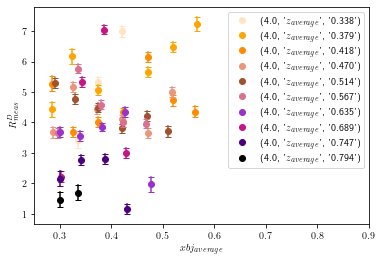

In [41]:
Q2 = 4.0
#RDs_xbj = []
#RDs_xbj_err = []
i_color = 0
colors = ['bisque','orange','darkorange','darksalmon','sienna','palevioletred','darkorchid','mediumvioletred','indigo','black']
for key_z,z_value in RD_Q2zxRunG["4.000000"].items():
    z_hadron = float(key_z) 
    #print(z_hadron)
    #fig = plt.figure()
    ax = fig.add_subplot()
    xbj_corrs = []
    RD_ones = []
    #color = ['b','g','r','c','m','y','firebrick','salmon','sienna','orange','tan','peachpuff','teal','hotpink']
    for key_xbj,xbj_value in z_value.items():
        xbj = float(key_xbj)
        #print(xbj)
        RDs = []
        RDs_err = []
        zs_corr = []
        zs_corr_err = []
        xbjs_corr = []
        xbjs_corr_err = []
        for key_RunGroup,RunGroup_value in xbj_value.items():
            RunGroup = float(key_RunGroup)
            RD=float(RunGroup_value["value"])
            RD_error = float(RunGroup_value["error"])
            RDs.append(float(RunGroup_value["value"]))
            RDs_error.append(float(RunGroup_value["error"]))
            z_corr = float(RunGroup_value["z_corr"])*z_hadron
            zs_corr.append(z_corr)
            z_corr_err = float(RunGroup_value["z_corr_err"])*z_hadron
            zs_corr_err.append(z_corr_err)
            xbj_corr = float(RunGroup_value["xbj_corr"])*xbj
            xbj_corr_err = float(RunGroup_value["xbj_corr_err"])
            xbjs_corr.append(xbj_corr)
            xbjs_corr_err.append(xbj_corr_err)
            #ax.plot([z_corr,z_corr],[RD+RD_error,RD-RD_error],marker="_",color = colors[RunGroup//10])
        xbj_corr = Get_weighted_average(xbjs_corr,xbjs_corr_err)
        z_corr = Get_weighted_average(zs_corr,zs_corr_err)
        RD = Get_weighted_average(RDs,RDs_error)
        RD_err = Get_weighted_sigma(RDs,RDs_error)
        W2 = 0.938**2+Q2*(1-xbj_corr)/xbj_corr
        #xbj_all_corr.append(xbj_corr)
        xbj_corrs.append(xbj_corr)
        RD_ones.append(RD)
        plt.plot([xbj_corr,xbj_corr],[RD+RD_err,RD-RD_err],marker = "_",color = colors[i_color])
    plt.plot(xbj_corrs,RD_ones,"o",label = (Q2,r'$z_{average}$',str(z_corr)[0:5]),color = colors[i_color])
    plt.xlabel(r'$xbj_{average}$')
    plt.ylabel(r'$R^D_{meas}$')
    plt.xlim(0.25,0.9)
    plt.legend()
    i_color +=1
    #ax.set_title(Q2)


